In [3]:
import numpy as np
from CrossSections import Transfer_SigmaV, Transfer_sigma
from scipy.optimize import minimize


## Fits con Datos de Camila

In [4]:
#Import Data from Camila Correa
CamilaData_Fig6 = np.loadtxt('Data-Sets/Data_Fig6_Correa_2021.txt')

VelocityData = CamilaData_Fig6[:,0]
Velocity_16_Percentile = CamilaData_Fig6[:,1]
Velocity_84_Percentile = CamilaData_Fig6[:,2]
VelocityData_Err = ( (VelocityData - Velocity_16_Percentile) + (Velocity_84_Percentile - VelocityData) ) /2

CrossSectionData = CamilaData_Fig6[:,3]
CrossSectionData_16_Percentile = CamilaData_Fig6[:,4]
CrossSectionData_84_Percentile = CamilaData_Fig6[:,5]

CrossSectionData_Err = ((CrossSectionData - CrossSectionData_16_Percentile) + (CrossSectionData_84_Percentile - CrossSectionData) )/2


In [34]:
def CamilaTranser(v, M, m):
    alpha = 0.01
    w = 300*(M/10)*(10/m)
    sigma0T = 137.8*(alpha/0.01)**2*(m/10)*(10/M)**4
    return sigma0T*4*w**4/v**4 * (2*np.log(1 + v**2/(2*w**2)) - np.log(1 + v**2/w**2) )


# Define a chi square distribution to use as input in emcee
def compute_chi2(free_params, x=VelocityData, data=CrossSectionData, err=(VelocityData_Err, CrossSectionData_Err)):
    #Compute model
    M, m = free_params
    model = [CamilaTranser(x, M=M, m=m) for x in x]

    errx, erry = err
    #chi2 computation
    chi2y= np.sum((data-model)**2/erry**2)
    chi2x= np.sum((x - 2*x*np.sqrt(2/np.pi))**2/errx**2)
    return chi2y + chi2x


Fits for Figure 6

In [35]:

M_ini, m_ini = 1, 10
initial = [M_ini, m_ini]

soln = minimize(compute_chi2, initial, method='Nelder-Mead')

M_bf, m_bf = soln.x

print("Best Fit Parameters")
print('M = {0:.2f} MeV'.format(M_bf))
print('m = {0:.2f} GeV'.format(m_bf))
print("Chi-squared:", compute_chi2((M_bf, m_bf) )/(len(VelocityData) - 1) )


Best Fit Parameters
M = 1.88 MeV
m = 0.16 GeV
Chi-squared: 3947.341690531346


Fits for Figure 7:

In [36]:
CamilaData_Fig7 = np.loadtxt('Data-Sets/Data_Fig7_Correa_2021.txt')
VelocityData = CamilaData_Fig7[:,0]
Velocity_16_Percentile = CamilaData_Fig7[:,1]
Velocity_84_Percentile = CamilaData_Fig7[:,2]
VelocityData_Err = ( (VelocityData - Velocity_16_Percentile) + (Velocity_84_Percentile - VelocityData) ) /2

CrossSectionData = CamilaData_Fig7[:,3]
CrossSectionData_16_Percentile = CamilaData_Fig7[:,4]
CrossSectionData_84_Percentile = CamilaData_Fig7[:,5]

CrossSectionData_Err = ((CrossSectionData - CrossSectionData_16_Percentile) + (CrossSectionData_84_Percentile - CrossSectionData) )/2


In [37]:

def Integrand_Camila_SigmaV(v, v0, M, m):
    return CamilaTranser(v, M, m)*v*np.exp(-0.5*v**2/v0**2)*v**2

from scipy.integrate import quad

def Camila_SigmaV(v0, M, m):
    sigma2_MB = v0**2*np.pi*(3*np.pi - 8)/np.pi
    vmax = 2*np.sqrt(sigma2_MB)

    Prefactor = 4*np.pi/((2*np.pi*v0**2)**1.5 * m)
    Integral = quad(Integrand_Camila_SigmaV, 0.1, vmax, args=(v0, M, m))[0]
    return Prefactor*Integral

# Define a chi square distribution to use as input in emcee
def compute_chi2(free_params, x=VelocityData, data=CrossSectionData, err=(VelocityData_Err, CrossSectionData_Err)):
    #Compute model
    M, m = free_params
    model = [Camila_SigmaV(x, M, m) for x in x]

    errx, erry = err
    #chi2 computation
    chi2y= np.sum((data-model)**2/erry**2)
    chi2x= np.sum((x - 2*x*np.sqrt(2/np.pi))**2/errx**2)
    return chi2y #+ chi2x

In [38]:
soln = minimize(compute_chi2, initial, method='Nelder-Mead')

M_bf, m_bf = soln.x

print("Best Fit Parameters")
print('M = {0:.2f} MeV'.format(M_bf))
print('m = {0:.2f} GeV'.format(m_bf))
print("Chi-squared:", compute_chi2((M_bf, m_bf)))

Best Fit Parameters
M = 7.28 MeV
m = 20.09 GeV
Chi-squared: 22.281826735811517


## Fits con datos de Yu

In [10]:
#for the plots
DwarfData = np.loadtxt('Data-Sets/DwarfDataPlot.csv', delimiter='\t')
Dwarf_x =     DwarfData[:,0]
Dwarf_y =     DwarfData[:,1]
Dwarf_Err_l = DwarfData[:,2]
Dwarf_Err_r = DwarfData[:,3]
Dwarf_Err_d = DwarfData[:,4]
Dwarf_Err_u = DwarfData[:,5]

GalaxyData = np.loadtxt('Data-Sets/GalaxyDataPlot.csv', delimiter='\t')
Galaxy_x = GalaxyData[:,0]
Galaxy_y = GalaxyData[:,1]
Galaxy_Err_l = GalaxyData[:,2]
Galaxy_Err_r = GalaxyData[:,3]
Galaxy_Err_d = GalaxyData[:,4]
Galaxy_Err_u = GalaxyData[:,5]

ClusterData = np.loadtxt('Data-Sets/ClusterDataPlot.csv', delimiter='\t')
Cluster_x = ClusterData[:,0]
Cluster_y = ClusterData[:,1]
Cluster_Err_l = ClusterData[:,2]
Cluster_Err_r = ClusterData[:,3]
Cluster_Err_d = ClusterData[:,4]
Cluster_Err_u = ClusterData[:,5]

# For the fit
OrderedData = np.loadtxt('Data-Sets/Datos_ordenados.csv')
x_data = OrderedData[:,0]
y_data = OrderedData[:,1]
err_x_data = OrderedData[:,2]
err_y_data = OrderedData[:,3]


In [11]:
def NormalTranser(v, M, m):
    alpha = 1/137
    w = 300*(M/10)*(10/m)
    sigma0T = 274.4*(alpha/0.01)**2*(m/10)*(10/M)**4
    return sigma0T*4*w**4/v**4 * (np.log(1 + v**2/(w**2)) - (v/w)**2/(1 + (v/w)**2) )

def Integrand_Normal_SigmaV(v, v0, M, m):
    return NormalTranser(v, M, m)*v*np.exp(-0.5*v**2/v0**2)*v**2

from scipy.integrate import quad

def Normal_SigmaV(v0, M, m):
    sigma2_MB = v0**2*np.pi*(3*np.pi - 8)/np.pi
    vmax = 2*np.sqrt(sigma2_MB)

    Prefactor = 4*np.pi/((2*np.pi*v0**2)**1.5 * m)
    Integral = quad(Integrand_Normal_SigmaV, 0.0, vmax, args=(v0, M, m))[0]
    return Prefactor*Integral

In [12]:

M_ini, m_ini = 10, 10
initial = [M_ini, m_ini]
bnds= [(0.01, 1000), (0.01, 1000)]

# Define a chi square distribution to use as input in emcee
def compute_chi2(free_params, x=x_data, data=y_data, err=(err_x_data, err_y_data)):
    #Compute model
    M, m = free_params
    model = [Normal_SigmaV(x, M=M, m=m) for x in x]

    errx, erry = err
    #chi2 computation
    chi2y= np.sum((data-model)**2/erry**2)
    chi2x= np.sum((x - 2*x*np.sqrt(2/np.pi))**2/errx**2)
    return chi2y + chi2x

soln = minimize(compute_chi2, initial, method='Nelder-Mead', bounds=bnds)

M_bf, m_bf = soln.x

print("Best Fit Parameters")
print('M = {0:.2f} MeV'.format(M_bf))
print('m = {0:.2f} GeV'.format(m_bf))
print("Chi-squared:", compute_chi2((M_bf, m_bf)))


Best Fit Parameters
M = 16.74 MeV
m = 9.96 GeV
Chi-squared: 1912472.709872893


Standard Cross Section but with Camila Data

In [13]:
def compute_chi2(free_params, x=VelocityData, data=CrossSectionData, err=(VelocityData_Err, CrossSectionData_Err)):
    #Compute model
    M, m = free_params
    model = [Normal_SigmaV(x, M=M, m=m) for x in x]

    errx, erry = err
    #chi2 computation
    chi2y= np.sum((data-model)**2/erry**2)
    chi2x= np.sum((x - 2*x*np.sqrt(2/np.pi))**2/errx**2)
    return chi2y #+ chi2x


M_ini, m_ini = 1, 10
initial = [M_ini, m_ini]


soln = minimize(compute_chi2, initial, method='Nelder-Mead')

M_bf, m_bf = soln.x

print("Best Fit Parameters")
print('M = {0:.2f} MeV'.format(M_bf))
print('m = {0:.2f} GeV'.format(m_bf))
print("Chi-squared:", compute_chi2((M_bf, m_bf)))

Best Fit Parameters
M = 8.80 MeV
m = 20.76 GeV
Chi-squared: 22.29372349282599


## Particle Physics Cross Section with Camila Data

Data From Dwarfs

In [23]:
#Import Data from Camila Correa
CamilaData_Fig6 = np.loadtxt('Data-Sets/Data_Fig6_Correa_2021.txt')

VelocityData = CamilaData_Fig6[:,0]
Velocity_16_Percentile = CamilaData_Fig6[:,1]
Velocity_84_Percentile = CamilaData_Fig6[:,2]
VelocityData_Err = ( (VelocityData - Velocity_16_Percentile) + (Velocity_84_Percentile - VelocityData) ) /2

CrossSectionData = CamilaData_Fig6[:,3]
CrossSectionData_16_Percentile = CamilaData_Fig6[:,4]
CrossSectionData_84_Percentile = CamilaData_Fig6[:,5]

CrossSectionData_Err = ((CrossSectionData - CrossSectionData_16_Percentile) + (CrossSectionData_84_Percentile - CrossSectionData) )/2

In [24]:
# Define a chi square distribution to use as input in emcee
def compute_chi2(free_params, x=VelocityData, data=CrossSectionData, err=(VelocityData_Err, CrossSectionData_Err)):
    #Compute model
    M, m = free_params
    model = [Transfer_sigma(x, g=0.3, M=M, m=m) for x in x]

    errx, erry = err
    #chi2 computation
    chi2y= np.sum((data-model)**2/erry**2)
    chi2x= np.sum((x - 2*x*np.sqrt(2/np.pi))**2/errx**2)
    return chi2y #+ chi2x


M_ini, m_ini = 10, 10
initial = [M_ini, m_ini]
bnds= [(1, 1000), (.01, 1000)]


soln = minimize(compute_chi2, initial, method='Nelder-Mead', bounds=bnds)

M_bf, m_bf = soln.x

print("Best Fit Parameters")
print('M = {0:.2f} MeV'.format(M_bf))
print('m = {0:.2f} GeV'.format(m_bf))
print("Chi-squared:", compute_chi2((M_bf, m_bf)))

Best Fit Parameters
M = 9.97 MeV
m = 10.59 GeV
Chi-squared: 268.4677777740588


Data From clusters

In [25]:
CamilaData_Fig7 = np.loadtxt('Data-Sets/Data_Fig7_Correa_2021.txt')
VelocityData = CamilaData_Fig7[:,0]
Velocity_16_Percentile = CamilaData_Fig7[:,1]
Velocity_84_Percentile = CamilaData_Fig7[:,2]
VelocityData_Err = ( (VelocityData - Velocity_16_Percentile) + (Velocity_84_Percentile - VelocityData) ) /2

CrossSectionData = CamilaData_Fig7[:,3]
CrossSectionData_16_Percentile = CamilaData_Fig7[:,4]
CrossSectionData_84_Percentile = CamilaData_Fig7[:,5]

CrossSectionData_Err = ((CrossSectionData - CrossSectionData_16_Percentile) + (CrossSectionData_84_Percentile - CrossSectionData) )/2


In [27]:
# Define a chi square distribution to use as input in emcee
def compute_chi2(free_params, x=VelocityData, data=CrossSectionData, err=(VelocityData_Err, CrossSectionData_Err)):
    #Compute model
    M, m = free_params
    model = [Transfer_SigmaV(x, g=0.3, M=M, m=m) for x in x]

    errx, erry = err
    #chi2 computation
    chi2y= np.sum((data-model)**2/erry**2)
    chi2x= np.sum((x - 2*x*np.sqrt(2/np.pi))**2/errx**2)
    return chi2y #+ chi2x


M_ini, m_ini = 0.01, 100
initial = [M_ini, m_ini]
bnds= [(.001, 100), (.01, 1000)]


soln = minimize(compute_chi2, initial, method='Nelder-Mead', bounds=bnds)

M_bf, m_bf = soln.x

print("Best Fit Parameters")
print('M = {0:.2f} GeV'.format(M_bf))
print('m = {0:.2f} GeV'.format(m_bf))
print("Chi-squared:", compute_chi2((M_bf, m_bf)))

Best Fit Parameters
M = 3.09 GeV
m = 1000.00 GeV
Chi-squared: 268.4661031274749


Data from Yu

In [28]:
# For the fit
OrderedData = np.loadtxt('Data-Sets/Datos_ordenados.csv')
x_data = OrderedData[:,0]
y_data = OrderedData[:,1]
err_x_data = OrderedData[:,2]
err_y_data = OrderedData[:,3]

In [30]:

M_ini, m_ini = .01, 10
initial = [M_ini, m_ini]
bnds= [(0.001, 100), (0.01, 1000)]

# Define a chi square distribution to use as input in emcee
def compute_chi2(free_params, x=x_data, data=y_data, err=(err_x_data, err_y_data)):
    #Compute model
    M, m = free_params
    model = [Transfer_SigmaV(x, M=M, m=m) for x in x]

    errx, erry = err
    #chi2 computation
    chi2y= np.sum((data-model)**2/erry**2)
    chi2x= np.sum((x - 2*x*np.sqrt(2/np.pi))**2/errx**2)
    return chi2y + chi2x

soln = minimize(compute_chi2, initial, method='Nelder-Mead', bounds=bnds)

M_bf, m_bf = soln.x

print("Best Fit Parameters")
print('M = {0:.2f} GeV'.format(M_bf))
print('m = {0:.2f} GeV'.format(m_bf))
print("Chi-squared:", compute_chi2((M_bf, m_bf)))

Best Fit Parameters
M = 8.77 GeV
m = 1000.00 GeV
Chi-squared: 2250574.5479085315


## MCMC

In [19]:
import emcee



"""
////////////// Functions for the Fit //////////////////
"""
#Useful functions to use emcee
class mcmc_res:
    def __init__(self, sampler, x0=None):
        self.sampler = sampler
        self.flat_samples = sampler.get_chain(discard=100, thin=15, flat=True)
        self.x = []
        self.x_low = []
        self.x_high = []
        self.ndim = self.flat_samples.shape[1]
        for i in range(self.ndim):
            mcmc = np.percentile(self.flat_samples[:, i], [16, 50, 84])
            q = np.diff(mcmc)
            self.x.append(mcmc[1])
            self.x_low.append(q[0])
            self.x_high.append(q[1])
        self.x0 = x0
        self.nonmarg_bestfit = sampler.flatchain[np.argmin(sampler.flatlnprobability)]
        
def run_mcmc(func_chi2, x0=None, bounds=None, nstep=5000, args=()):    
    assert x0 is not None, 'please, provide a first guess of the parameter values'
    assert bounds is not None, 'please, provide the boundaries of the parameter hyperspace'    
    def log_prior(theta, bounds):
        theta_l = list(theta)
        for i, pp in enumerate(theta_l):
            if (pp < bounds[i][0]) | (pp > bounds[i][1]):
                return -np.inf
        return 0    
    def log_likelihood(theta, *args):
        return -0.5 * func_chi2(theta, *args)    
    def log_probability(theta, *args):
        lp = log_prior(theta, bounds)
        if not np.isfinite(lp):
            return -np.inf
        return lp + log_likelihood(theta, *args)    
    #import emcee    
    ndim = len(x0)
    nwalkers = 4 * ndim    
    pos = x0 + 1e-4 * np.random.randn(nwalkers, ndim)    
    sampler = emcee.EnsembleSampler(nwalkers, ndim, log_probability, args=args)
    sampler.run_mcmc(pos, nstep, progress=True)    
    result = mcmc_res(sampler, x0=x0) 
    # Autocorrelation time
    #tau = sampler.get_autocorr_time()
    #print(tau)
    return result

In [22]:
data_args = (VelocityData, CrossSectionData, (VelocityData_Err, CrossSectionData_Err))


M_ini, m_ini = 0.01, 100
initial = [M_ini, m_ini]
bnds= [(0.001, 100), (.01, 1000)]


bf = run_mcmc(compute_chi2, x0=initial, bounds=bnds)

bf.x

  0%|          | 21/5000 [00:10<36:05,  2.30it/s]d:\Nicolás\Documents\Research\Pre-Prints\Leptophilic-Atlas\Leptophilic-Atlas-Repo\Leptophilic-Atlas-Repo\CrossSections.py:157: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  Integral = quad(Transfer_SigV_integrand, 0.1, vmax, args=(v0, g, M, m))[0]
100%|██████████| 5000/5000 [06:59<00:00, 11.91it/s]


[52.02433434957565, 489.4104118629]

In [31]:
data_args = (x_data, y_data, (err_x_data, err_y_data))

M_ini, m_ini = 0.01, 100
initial = [M_ini, m_ini]
bnds= [(0.001, 100), (.01, 1000)]


bfY = run_mcmc(compute_chi2, x0=initial, bounds=bnds)

bfY.x

100%|██████████| 5000/5000 [10:56<00:00,  7.62it/s]


[53.014090183501295, 508.3981849187757]

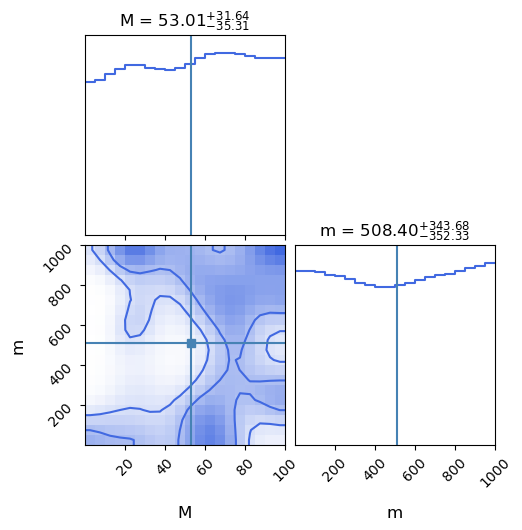

In [32]:
import corner

truth = bfY.x
labels = ['M', 'm']
bounds = bnds

figure = corner.corner(
            bfY.flat_samples, labels=labels, title_kwargs={"fontsize": 12}, 
            label_kwargs={"fontsize": 12}, smooth=2, smooth1d=2, truths=truth,
            range=bounds, color='royalblue',
            levels=(0.39,0.68), plot_datapoints=False, show_titles=True
        )

In [33]:
def compute_chi2(free_params, x=x_data, data=y_data, err=(err_x_data, err_y_data)):
    #Compute model
    M, m = free_params
    model = [Transfer_SigmaV(x, g=0.1, M=M, m=m) for x in x]

    errx, erry = err
    #chi2 computation
    chi2y= np.sum((data-model)**2/erry**2)
    chi2x= np.sum((x - 2*x*np.sqrt(2/np.pi))**2/errx**2)
    return chi2y + chi2x


M_ini, m_ini = 0.01, 100
initial = [M_ini, m_ini]
bnds= [(0.001, 100), (.01, 1000)]


bf2 = run_mcmc(compute_chi2, x0=initial, bounds=bnds)

bf2.x

100%|██████████| 5000/5000 [11:04<00:00,  7.53it/s]


[49.40306679690377, 503.26334887433825]

## Plots

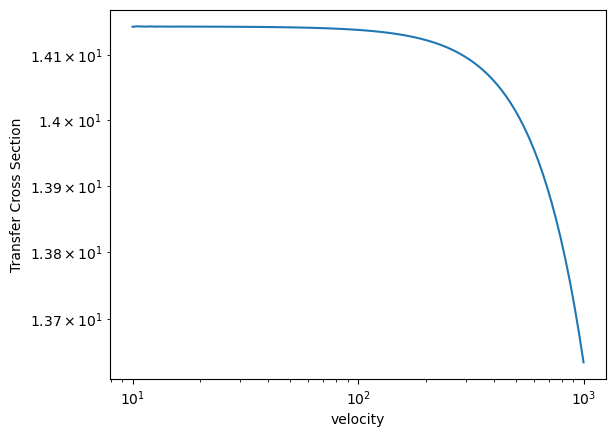

In [2]:
import matplotlib.pyplot as plt 
v_array = np.logspace(1, 3, 100)
crossSection_array = [Transfer_sigma(v) for v in v_array]


plt.plot(v_array, crossSection_array)


plt.xscale('log')
plt.yscale('log')
plt.ylabel('Transfer Cross Section')
plt.xlabel('velocity')
plt.show()
